### Necessary imports
Imports all necessary packages for this project

In [140]:
# import libraries
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from langdetect import detect, DetectorFactory
from deep_translator import GoogleTranslator

### Dataset
The cybersecurity job market is constantly evolving, and LinkedIn hosts numerous job advertisements related to the field. To ensure the dataset reflects current real-world demands, updated job postings were collected.

After some research, a useful Chrome extension was identified:

**ScrapeJob ‚Äì LinkedIn Jobs Scraper:**

With proper configuration, this tool extracts job listings, company details, and job poster information from LinkedIn postings.

For more details, visit:
https://linkedin.scrapejob.net/

In [116]:
# load the data
data = pd.read_json('data/li_jobs.json')

### Data exploration

In [117]:
# number of rows / samples
row_count = data.shape[0]
row_count

604

In [118]:
# print the first few rows of the data
data.head()

Title  \
0  Mitarbeiter Organisationsmanagement & Prozesso...   
1  Senior Operations & Automation Manager ‚Äì Label...   
2                      Middelbaar Veiligheidskundige   
3                         Security consultant - SIEM   
4                    Information Technology Graduate   

                                         Description  \
0  Standort: Lohr a.MainBesch√§ftigungsverh√§ltnis:...   
1  \n\nYour mission\n\n\n\nAbout Label OS\n\nLabe...   
2  Ben jij d√© specialist in arbeidsveiligheid en ...   
3  Hƒæad√°me odborn√≠ka na technol√≥giu SIEM a oblas≈•...   
4  CityLearning, a leading provider of compliance...   

                                 Primary Description  \
0  Raiffeisen Immobilien-Dienstleistungs GmbH ¬∑ L...   
1        iGroove ¬∑ Berlin, Berlin, Germany (On-site)   
2  Groothuis Bouw Emmeloord ¬∑ Emmeloord, Flevolan...   
3  exe, a.s. ¬∑ Bratislava Metropolitan Area (Hybrid)   
4  CityLearning ¬∑ Dublin, County Dublin, Ireland ...   

                                      Detail URL  \
0  https://www.linkedin.com/jobs/view/4169550707   
1  https://www.linkedin.com/jobs/view/4144186025   
2  https://www.linkedin.com/jobs/view/4118527660   
3  https://www.linkedin.com/jobs/view/4153637949   
4  https://www.linkedin.com/jobs/view/4170246916   

                            Location  \
0             Lohr, Bavaria, Germany   
1            Berlin, Berlin, Germany   
2  Emmeloord, Flevoland, Netherlands   
3       Bratislava Metropolitan Area   
4     Dublin, County Dublin, Ireland   

                                               Skill Insight Job State  \
0  Skills: Spanish, Artificial Intelligence (AI),...            LISTED   
1       Skills: Soft Skills, Data Analytics, +8 more            LISTED   
2                                                               LISTED   
3  Skills: Information Security, Cybersecurity, +...            LISTED   
4  8 of 10 skills match your profile - you may be...            LISTED   

    Poster Id              Company Name  ... Headquarters Company Founded  \
0  1479512611                            ...                                
1   222132374                   iGroove  ...    Pf√§ffikon            2013   
2   653913933  Groothuis Bouw Emmeloord  ...    Emmeloord                   
3   449502629                 exe, a.s.  ...   Bratislava            1990   
4    72468613              CityLearning  ...     Dublin 2            1998   

                                         Specialties Hiring Manager Title  \
0                                                                           
1  Digital Music Distribution,Label Services,Arti...    Patrick Lawritsch   
2  Het bouwen van vrijstaande woningen,Traditione...                        
3  Projecting Enterprise Information Systems,Soft...                        
4  GDPR,Data Protection,Combat Money Laundering,I...                        

                             Hiring Manager Subtitle  \
0                                                      
1  COO iGroove // Entrepreneur | Trusted Expert \...   
2                                                      
3                                                      
4                                                      

  Hiring Manager Title Insight                  Hiring Manager Profile  \
0                                                                        
1                          3rd  https://www.linkedin.com/in/plawritsch   
2                                                                        
3                                                                        
4                                                                        

                                Hiring Manager Image  \
0                                                      
1  https://media.licdn.com/dms/image/v2/C4D03AQGV...   
2                                                      
3                                                      
4                                

In [119]:
data.columns

Index(['Title', 'Description', 'Primary Description', 'Detail URL', 'Location',
       'Skill', 'Insight', 'Job State', 'Poster Id', 'Company Name',
       'Company Description', 'Company Website', 'Company Logo',
       'Company Apply Url', 'Industry', 'Employee Count', 'Headquarters',
       'Company Founded', 'Specialties', 'Hiring Manager Title',
       'Hiring Manager Subtitle', 'Hiring Manager Title Insight',
       'Hiring Manager Profile', 'Hiring Manager Image', 'Created At',
       'Scraped At'],
      dtype='object')

### Building a DataFrame

In [120]:
# convert data to a DataFrame
df = pd.DataFrame(data)

### Preprocessing

**Cleaning the DataFrame:** drop unneeded columns

In [121]:
# Drop hiring manager-related columns, scrape info, non needed columns
columns_to_drop = [
    "Headquarters", "Company Apply Url", "Company Founded", "Company Logo",
    "Hiring Manager Title", "Hiring Manager Subtitle", "Hiring Manager Title Insight", 
    "Hiring Manager Profile", "Hiring Manager Image", "Created At",
    "Scraped At", "Insight", "Job State",
]
df.drop(columns=columns_to_drop, errors="ignore", inplace=True)


df.columns

Index(['Title', 'Description', 'Primary Description', 'Detail URL', 'Location',
       'Skill', 'Poster Id', 'Company Name', 'Company Description',
       'Company Website', 'Industry', 'Employee Count', 'Specialties'],
      dtype='object')

**Handling missing values**

In [122]:
# check for missing values
(df == "").sum()

Title                    0
Description              0
Primary Description      0
Detail URL               0
Location                 0
Skill                  217
Poster Id               34
Company Name            10
Company Description     12
Company Website         24
Industry                11
Employee Count          13
Specialties            112
dtype: int64

**Removing \n from descriptions**

In [123]:
df["Description"] = df["Description"].str.replace("\n", ". ", regex=True)
df["Company Description"] = df["Company Description"].str.replace("\n", ". ", regex=True)

In [124]:
# print the first few rows of the DataFrame
df.head(30)

Title  \
0   Mitarbeiter Organisationsmanagement & Prozesso...   
1   Senior Operations & Automation Manager ‚Äì Label...   
2                       Middelbaar Veiligheidskundige   
3                          Security consultant - SIEM   
4                     Information Technology Graduate   
5   Systeem en netwerkbeheerder met security affin...   
6                                       Data Engineer   
7                                 Addetto Reparto ICT   
8                      IT Security Consultant (m/w/d)   
9                  Artificial Intelligence Specialist   
10                     Business Development Executive   
11     Chief Information Security Officer (CISO) (gn)   
12     IT Analyst bei True Circularity Leader (m/w/d)   
13                   Chief Technology Officer (m/f/d)   
14  Administrator IT ‚Äì Schwerpunkt Linux und Daten...   
15                        Senior System Administrator   
16     IT Engineer (f/m/x) Network and Cyber Security   
17                  Teamleitung (w/m/d) IT-Consulting   
18                                       IT recruiter   
19                           Senior Security Engineer   
20                 IT-Sicherheitsbeauftragter (m/w/d)   
21                     IT-Security Spezialist (w|m|d)   
22  Junior Business Continuity & Risk Manager (m/w/d)   
23                           IT System Engineer (*gn)   
24  Junior IT-Systemadministrator (m/w/d) in Voll-...   
25  Data Engineer / Data Scientist (Tableau + SQL ...   
26                      Professional Internship - WEB   
27            Software Engineer (Data & Architecture)   
28  Duales Bachelor-Studium Angewandte Informatik ...   
29                                     Data Scientist   

                                          Description  \
0   Standort: Lohr a.MainBesch√§ftigungsverh√§ltnis:...   
1   . . Your mission. . . . About Label OS. . Labe...   
2   Ben jij d√© specialist in arbeidsveiligheid en ...   
3   Hƒæad√°me odborn√≠ka na technol√≥giu SIEM a oblas≈•...   
4   CityLearning, a leading provider of compliance...   
5   Als Security Systeem- en Netwerkbeheerder bij ...   
6   Job Description:We are seeking a skilled Data ...   
7   Azienda L'azienda promotrice della ricerca ha ...   
8   . . Du bringst bereits fundierte Erfahrung im ...   
9   *** Gestalte die Zukunft der generativen KI mi...   
10  Kyte Global is looking to strengthen its team ...   
11  Join our team at the Boerse Stuttgart Group as...   
12  True Circularity mit saperatec. .  Wir bei sap...   
13  For over 10 years, we have been helping mid-si...   
14  . . Ihre Aufgaben. . Server-Administration: Pl...   
15  Bonjour,. Limelogic est une soci√©t√© d'infog√©ra...   
16  The DZNE is a world-leading, internationally o...   
17  Wir verstehen Verwaltung! .  Der Kommunale Bet...   
18  Az AZ9 Services Kft. els≈ësorban f√ºggetlen IT t...   
19  Il Gruppo E ricerca per la propria sede di Fir...   
20  Radioaktive Abf√§lle bis zu ihrer Endlagerung n...   
21  Verbinden Sie Ihre Leidenschaft f√ºr IT - Secur...   
22  Gemeinsam Finanzen und Menschen im Blick Die W...   
23  . . DAS ERWARTET DICH.... . Du bist f√ºr die Pl...   
24  SKR Reisen ist das Original fuÃàr besondere Erl...   
25  En Sg Tech necesitamos un perfil de Data Engin...   
26  VORTEX-CoLab is a growing collaborative labora...   
27  Who we areCardano was founded in 2000. At Card...   
28  Mobilit√§t gestalten f√ºr unsere Sicherheit!Die ...   
29  Martailer is a leading retail media platform d...   

                                  Primary Description  \
0   Raiffeisen Immobilien-Dienstleistungs GmbH ¬∑ L...   
1         iGroove ¬∑ Berlin, Berlin, Germany (On-site)   
2   Groothuis Bouw Emmeloord ¬∑ Emmeloord, Flevolan...   
3   exe, a.s. ¬∑ Bratislava Metropolitan Area (Hybrid)   
4   CityLearning ¬∑ Dublin, County Dublin, Ireland ...   
5   Fortytwo Security ¬∑ Amsterdam, North Holland, ...   
6   JSS ASSOCIATES  ¬∑ Warsaw Metropolitan Area (Hy...   
7      Webb James ¬∑ Livor

**Cleaning the DataFrame:** Remove irrelevant information from skill-related columns, as these contain personalized recommendations based on the (personal) account used for scraping.

In [125]:
# Preprocess the Skill column
def clean_skills(skill_str):
    if isinstance(skill_str, str):
        # Remove "Skills: " if it appears at the beginning
        skill_str = re.sub(r"^Skills:\s*", "", skill_str).strip()
        # Remove "X of Y skills match your profile - you may be ..." pattern
        skill_str = re.sub(r"\d+\s+of\s+\d+\s+skills match your profile - you may be.*", "", skill_str, flags=re.IGNORECASE).strip()
        # Remove ", +X more" where X is any number
        skill_str = re.sub(r",\s\+\d+\s+more", "", skill_str).strip()
        return skill_str
    return ""

In [126]:
df["Skill"] = df["Skill"].apply(clean_skills)
df.head(20)

Title  \
0   Mitarbeiter Organisationsmanagement & Prozesso...   
1   Senior Operations & Automation Manager ‚Äì Label...   
2                       Middelbaar Veiligheidskundige   
3                          Security consultant - SIEM   
4                     Information Technology Graduate   
5   Systeem en netwerkbeheerder met security affin...   
6                                       Data Engineer   
7                                 Addetto Reparto ICT   
8                      IT Security Consultant (m/w/d)   
9                  Artificial Intelligence Specialist   
10                     Business Development Executive   
11     Chief Information Security Officer (CISO) (gn)   
12     IT Analyst bei True Circularity Leader (m/w/d)   
13                   Chief Technology Officer (m/f/d)   
14  Administrator IT ‚Äì Schwerpunkt Linux und Daten...   
15                        Senior System Administrator   
16     IT Engineer (f/m/x) Network and Cyber Security   
17                  Teamleitung (w/m/d) IT-Consulting   
18                                       IT recruiter   
19                           Senior Security Engineer   

                                          Description  \
0   Standort: Lohr a.MainBesch√§ftigungsverh√§ltnis:...   
1   . . Your mission. . . . About Label OS. . Labe...   
2   Ben jij d√© specialist in arbeidsveiligheid en ...   
3   Hƒæad√°me odborn√≠ka na technol√≥giu SIEM a oblas≈•...   
4   CityLearning, a leading provider of compliance...   
5   Als Security Systeem- en Netwerkbeheerder bij ...   
6   Job Description:We are seeking a skilled Data ...   
7   Azienda L'azienda promotrice della ricerca ha ...   
8   . . Du bringst bereits fundierte Erfahrung im ...   
9   *** Gestalte die Zukunft der generativen KI mi...   
10  Kyte Global is looking to strengthen its team ...   
11  Join our team at the Boerse Stuttgart Group as...   
12  True Circularity mit saperatec. .  Wir bei sap...   
13  For over 10 years, we have been helping mid-si...   
14  . . Ihre Aufgaben. . Server-Administration: Pl...   
15  Bonjour,. Limelogic est une soci√©t√© d'infog√©ra...   
16  The DZNE is a world-leading, internationally o...   
17  Wir verstehen Verwaltung! .  Der Kommunale Bet...   
18  Az AZ9 Services Kft. els≈ësorban f√ºggetlen IT t...   
19  Il Gruppo E ricerca per la propria sede di Fir...   

                                  Primary Description  \
0   Raiffeisen Immobilien-Dienstleistungs GmbH ¬∑ L...   
1         iGroove ¬∑ Berlin, Berlin, Germany (On-site)   
2   Groothuis Bouw Emmeloord ¬∑ Emmeloord, Flevolan...   
3   exe, a.s. ¬∑ Bratislava Metropolitan Area (Hybrid)   
4   CityLearning ¬∑ Dublin, County Dublin, Ireland ...   
5   Fortytwo Security ¬∑ Amsterdam, North Holland, ...   
6   JSS ASSOCIATES  ¬∑ Warsaw Metropolitan Area (Hy...   
7      Webb James ¬∑ Livorno, Tuscany, Italy (On-site)   
8   hagebau IT GmbH ¬∑ Soltau, Lower Saxony, German...   
9          FindYou Consulting GmbH ¬∑ Germany (Remote)   
10           Kyte Global ¬∑ Birkirkara, Malta (Hybrid)   
11  Boerse Stuttgart Group ¬∑ Stuttgart, Baden-W√ºrt...   
12  saperatec ¬∑ Dessau, Saxony-Anhalt, Germany (On...   
13         Thorit ¬∑ Lisbon, Lisbon, Portugal (Hybrid)   
14  PEARL. GmbH ¬∑ Buggingen, Baden-W√ºrttemberg, Ge...   
15  LIMELOGIC ¬∑ Li√®ge, Walloon Region, Belgium (Hy...   
16  German Center for Neurodegenerative Diseases (...   
17  KommunalBIT A√∂R ¬∑ Nuremberg, Bavaria, Germany ...   
18  AZ9 Services Kft. ¬∑ Budapest, Budapest, Hungar...   
19  Gruppo E | Alleati IT ¬∑ Florence, Tuscany, Ita...   

                                       Detail URL  \
0   https://www.linkedin.com/jobs/view/4169550707   
1   https://www.linkedin.com/jobs/view/4144186025   
2   https://www.linkedin.com/jobs/view/4118527660   
3   https://www.linkedin.com/jobs/view/4153637949   
4   https://www.linkedin.com/jobs/view/4170246916   
5   https://www.linkedin.com/jobs/view/4033998205   
6   https://www.linkedin.com/jobs/view/4172

**Converting data types**

In [127]:
df["Employee Count"] = pd.to_numeric(df["Employee Count"], errors="coerce")

In [129]:
df.head(20)

Title  \
0   Mitarbeiter Organisationsmanagement & Prozesso...   
1   Senior Operations & Automation Manager ‚Äì Label...   
2                       Middelbaar Veiligheidskundige   
3                          Security consultant - SIEM   
4                     Information Technology Graduate   
5   Systeem en netwerkbeheerder met security affin...   
6                                       Data Engineer   
7                                 Addetto Reparto ICT   
8                      IT Security Consultant (m/w/d)   
9                  Artificial Intelligence Specialist   
10                     Business Development Executive   
11     Chief Information Security Officer (CISO) (gn)   
12     IT Analyst bei True Circularity Leader (m/w/d)   
13                   Chief Technology Officer (m/f/d)   
14  Administrator IT ‚Äì Schwerpunkt Linux und Daten...   
15                        Senior System Administrator   
16     IT Engineer (f/m/x) Network and Cyber Security   
17                  Teamleitung (w/m/d) IT-Consulting   
18                                       IT recruiter   
19                           Senior Security Engineer   

                                          Description  \
0   Standort: Lohr a.MainBesch√§ftigungsverh√§ltnis:...   
1   . . Your mission. . . . About Label OS. . Labe...   
2   Ben jij d√© specialist in arbeidsveiligheid en ...   
3   Hƒæad√°me odborn√≠ka na technol√≥giu SIEM a oblas≈•...   
4   CityLearning, a leading provider of compliance...   
5   Als Security Systeem- en Netwerkbeheerder bij ...   
6   Job Description:We are seeking a skilled Data ...   
7   Azienda L'azienda promotrice della ricerca ha ...   
8   . . Du bringst bereits fundierte Erfahrung im ...   
9   *** Gestalte die Zukunft der generativen KI mi...   
10  Kyte Global is looking to strengthen its team ...   
11  Join our team at the Boerse Stuttgart Group as...   
12  True Circularity mit saperatec. .  Wir bei sap...   
13  For over 10 years, we have been helping mid-si...   
14  . . Ihre Aufgaben. . Server-Administration: Pl...   
15  Bonjour,. Limelogic est une soci√©t√© d'infog√©ra...   
16  The DZNE is a world-leading, internationally o...   
17  Wir verstehen Verwaltung! .  Der Kommunale Bet...   
18  Az AZ9 Services Kft. els≈ësorban f√ºggetlen IT t...   
19  Il Gruppo E ricerca per la propria sede di Fir...   

                                  Primary Description  \
0   Raiffeisen Immobilien-Dienstleistungs GmbH ¬∑ L...   
1         iGroove ¬∑ Berlin, Berlin, Germany (On-site)   
2   Groothuis Bouw Emmeloord ¬∑ Emmeloord, Flevolan...   
3   exe, a.s. ¬∑ Bratislava Metropolitan Area (Hybrid)   
4   CityLearning ¬∑ Dublin, County Dublin, Ireland ...   
5   Fortytwo Security ¬∑ Amsterdam, North Holland, ...   
6   JSS ASSOCIATES  ¬∑ Warsaw Metropolitan Area (Hy...   
7      Webb James ¬∑ Livorno, Tuscany, Italy (On-site)   
8   hagebau IT GmbH ¬∑ Soltau, Lower Saxony, German...   
9          FindYou Consulting GmbH ¬∑ Germany (Remote)   
10           Kyte Global ¬∑ Birkirkara, Malta (Hybrid)   
11  Boerse Stuttgart Group ¬∑ Stuttgart, Baden-W√ºrt...   
12  saperatec ¬∑ Dessau, Saxony-Anhalt, Germany (On...   
13         Thorit ¬∑ Lisbon, Lisbon, Portugal (Hybrid)   
14  PEARL. GmbH ¬∑ Buggingen, Baden-W√ºrttemberg, Ge...   
15  LIMELOGIC ¬∑ Li√®ge, Walloon Region, Belgium (Hy...   
16  German Center for Neurodegenerative Diseases (...   
17  KommunalBIT A√∂R ¬∑ Nuremberg, Bavaria, Germany ...   
18  AZ9 Services Kft. ¬∑ Budapest, Budapest, Hungar...   
19  Gruppo E | Alleati IT ¬∑ Florence, Tuscany, Ita...   

                                       Detail URL  \
0   https://www.linkedin.com/jobs/view/4169550707   
1   https://www.linkedin.com/jobs/view/4144186025   
2   https://www.linkedin.com/jobs/view/4118527660   
3   https://www.linkedin.com/jobs/view/4153637949   
4   https://www.linkedin.com/jobs/view/4170246916   
5   https://www.linkedin.com/jobs/view/4033998205   
6   https://www.linkedin.com/jobs/view/4172

**Language Detection and Translation**:
Since the dataset consists of LinkedIn job ads from European countries, some postings are in English, while others appear in different European languages. To ensure consistency and meaningful analysis, all job descriptions need to be in English.

To achieve this, a preprocessing flow was implemented:

1. Language Detection: Each job ad is analyzed to determine its language.

2. Translation: If the ad is not in English, it is automatically translated.

3. Standardization: The final dataset contains all job postings in English, allowing for uniform text analysis.

In [64]:
DetectorFactory.seed = 0  # Ensures consistent language detection

In [68]:
def detect_and_translate(df, sample_size=row_count, show_original=False):
    """
    Detects the language of specified columns and translates non-English text into English.
    Breaks texts longer than 5000 characters into chunks for translation (due to limitations of the translation API).
    Parameters:
        df (pd.DataFrame): DataFrame containing job listings.
        sample_size (int): Number of rows to process for validation.
        show_original (bool): If True, keeps original text in new columns for comparison.
    Returns:
        pd.DataFrame: Modified DataFrame with translations.
    """

    # Columns to translate
    translate_cols = ['Title', 'Description', 'Primary Description', 'Specialties', 'Company Description']
    
    # Sample for validation
    sample_df = df.sample(n=sample_size, random_state=42).copy()

    def translate_text(text):
        """Detects language and translates to English, splitting if >5000 chars."""
        if pd.isna(text) or text.strip() == "":
            return text  # Skip empty or NaN values
        try:
            lang = detect(text)
            if lang != "en":
                if len(text) > 5000:
                    # Split into chunks under 5000 chars
                    chunks = []
                    start = 0
                    while start < len(text):
                        end = min(start + 4999, len(text))  # Max chunk size 4999
                        # Try to split at a natural boundary (period or space)
                        if end < len(text):
                            last_period = text.rfind('.', start, end)
                            last_space = text.rfind(' ', start, end)
                            split_point = max(last_period, last_space) if max(last_period, last_space) > start else end
                            end = split_point if split_point > start else end
                        chunks.append(text[start:end])
                        start = end + 1 if end < len(text) and text[end] in '. ' else end
                    # Translate each chunk and join
                    translated_chunks = []
                    for chunk in chunks:
                        if chunk.strip():  # Only translate non-empty chunks
                            translated_chunks.append(GoogleTranslator(source=lang, target="en").translate(chunk))
                        else:
                            translated_chunks.append(chunk)
                    return ' '.join(translated_chunks)
                else:
                    return GoogleTranslator(source=lang, target="en").translate(text)
        except Exception as e:
            print(f"Translation error: {e}")
            return text  # Return original text if translation fails
        return text  # Return original text if English

    # Apply translation function
    for col in translate_cols:
        if col in sample_df.columns:
            if show_original:
                # Store original text in a new column
                sample_df[f"{col}_original"] = sample_df[col]
            # Replace with translated text
            sample_df[col] = sample_df[col].apply(translate_text)

    return sample_df


**Testing the function, and valitading the results with a small sample**

In [ ]:
# Test with a sample 20 rows, showing original text and translations
translated_sample = detect_and_translate(df, sample_size=30, show_original=True)

In [70]:
translated_sample.head(30)

Title  \
110  Front End Web Developer @ Euro -Funk Kappacher...   
452  Graduate Programme - Software Development and ...   
568                                Database - Modeling   
77                                     DevOps Engineer   
181                                         Internally   
284                IT Administrator & Support Engineer   
10                      Business Development Executive   
473    Working Student Artificial Intelligence (m/w/d)   
78                                       Data Engineer   
350                                      Data Engineer   
55                                      Traineeship IT   
118                                       Data Analyst   
109                                      Data Engineer   
592                                   Python Developer   
371                        Junior Full Stack Developer   
234                                      IT Specialist   
30                                       Data Engineer   
212                  Junior Consultant - Cybersecurity   
184                     Information Technology Analyst   
86                    Legal/Compliance Officer (m/w/d)   
2                               Middle security expert   
374                 Generative AI Engineer - Freelance   
538                                      Data Engineer   
600                        Junior Full Stack Developer   
370                            Front-end Web Developer   
318                         Software Developer (f/m/x)   
72                      Information Technology Manager   
135                       Information Security Analyst   
559                        Frontend Developer (Remote)   
443                               IT student assistant   

                                           Description  \
110  Front End Web Developer @ eurofunk Kappacher G...   
452  Are you passionate about coding and developing...   
568  Job Description:  Build database systems of hi...   
77   EMPLOYMENT OFFER: Devops / Devsecopsubicaci√≥n:...   
181  PCN Recruitment Agency (Intern Recruitment Con...   
284  Come and join the leading #avoexperts ü•ë  Westf...   
10   Kyte Global is looking to strengthen its team ...   
473  Come on board We are a dynamic and fast-growin...   
78   In Albert, we are proud of our work, because o...   
350  Astrelya is an IT consulting and expertise gro...   
55   Erasmustalent.nl is an online vacancy platform...   
118   Role DescriptionThis is a part-time on-site D...   
109  Vention is looking for a Data Engineer in Brat...   
592  Python Developer ‚Äì Security Automation üìç Locat...   
371  As a Junior Full Stack Developer at INNIO, you...   
234  IT Specialist (MY46103-1) A well-known Japanes...   
30   Job description Data Engineer - Become a key p...   
212  Who we are a multinational management group of...   
184    Role DescriptionThis is a part-time remote r...   
86   We contact committed and result -oriented team...   
2    Are you the specialist in occupational safety ...   
374  Job Title: Freelance Generative AI SpecialistL...   
538  Would you work as a member of a strong profess...   
600  As a Junior Full Stack Developer at INNIO, you...   
370  Are you a highly motivated Front-End Developer...   
318  Your role   Design, implement and maintain sof...   
72   With a legacy spanning over five decades, Blue...   
135  Job RequirementsYour profile:You have at least...   
559  At Cryptohopper we're looking for a Lead Front...   
443  Company Description  Are you an IT student rea...   

                                   Primary Description  \
110    DEVjobs ¬∑ Linz, Upper Austria, Austria (Hybrid)   
452  FNZ Group ¬∑ Brno, South Moravia, Czechia (On-s...   
568  Smartedge Solutions ¬∑ Budapest, Budapest, Hung...   
77   PAYMATICO ¬∑ Salamanca, Castilla and Leon, Spai...   
181  PCN ¬∑ Amsterdam, North Holland, Netherlands (O...   
284  Westfalia Fruit ¬∑ Poeldijk, South Holland, Net...   
10            Kyte Global ¬∑ B

In [103]:
# cleaning variable for sampling purposes, as it's not needed anymore
del translated_sample

**Apply the detect and translate function to the DataFrame**:
The result will be our preprocessed structure so far, with the translated rows when needed. Original language descriptions will not be stored anymore.

In [71]:
df = detect_and_translate(df)

In [72]:
df.head(50)

Title  \
110  Front End Web Developer @ Euro -Funk Kappacher...   
452  Graduate Programme - Software Development and ...   
568                                Database - Modeling   
77                                     DevOps Engineer   
181                                         Internally   
284                IT Administrator & Support Engineer   
10                      Business Development Executive   
473    Working Student Artificial Intelligence (m/w/d)   
78                                       Data Engineer   
350                                      Data Engineer   
55                                      Traineeship IT   
118                                       Data Analyst   
109                                      Data Engineer   
592                                   Python Developer   
371                        Junior Full Stack Developer   
234                                      IT Specialist   
30                                       Data Engineer   
212                  Junior Consultant - Cybersecurity   
184                     Information Technology Analyst   
86                    Legal/Compliance Officer (m/w/d)   
2                               Middle security expert   
374                 Generative AI Engineer - Freelance   
538                                      Data Engineer   
600                        Junior Full Stack Developer   
370                            Front-end Web Developer   
318                         Software Developer (f/m/x)   
72                      Information Technology Manager   
135                       Information Security Analyst   
559                        Frontend Developer (Remote)   
443                               IT student assistant   
599                                      Data Engineer   
163                                            Analyst   
82                                   Software Engineer   
257                                         It Manager   
192                            IT SYSTEM ADMINISTRATOR   
457         Software Consultant/ IT Consultant (m/w/d)   
132                                      It-Consultant   
518                                   Aml Data Analyst   
445       Working student: In Data Science (M | W | D)   
275          Full-Stack Developer (mid-level, on-site)   
554                                   Business Analyst   
29                                      Data Scientist   
509                      Junior ICT Compliance Officer   
574                             Data Analyst - Product   
24   Junior IT system administrator (m/f/d) at full...   
182                              Full Stack Developer    
395        Senior Fullstack Security/Software Engineer   
104  Management (m/f/d) for applied cyber security ...   
63                    IT Infrastructure Junior Analyst   
361                                          Ai expert   

                                           Description  \
110  Front End Web Developer @ eurofunk Kappacher G...   
452  Are you passionate about coding and developing...   
568  Job Description:  Build database systems of hi...   
77   EMPLOYMENT OFFER: Devops / Devsecopsubicaci√≥n:...   
181  PCN Recruitment Agency (Intern Recruitment Con...   
284  Come and join the leading #avoexperts ü•ë  Westf...   
10   Kyte Global is looking to strengthen its team ...   
473  Come on board We are a dynamic and fast-growin...   
78   In Albert, we are proud of our work, because o...   
350  Astrelya is an IT consulting and expertise gro...   
55   Erasmustalent.nl is an online vacancy platform...   
118   Role DescriptionThis is a part-time on-site D...   
109  Vention is looking for a Data Engineer in Brat...   
592  Python Developer ‚Äì Security Automation üìç Locat...   
371  As a Junior Full Stack Developer at INNIO, you...   
234  IT Specialist (MY46103-1) A well-known Japanes...   
30   Job description Data Engineer - Become a key p...   
212  Who we are a multinational manag

**Cleaning the description column**: we already know the job description is contained in the description column. But some advertisers are still including "job description", "job title", "role description", "about the job", "about the role" (an related phrases), in this cell. As this is not useful for the analysis, a cleaning function will be applied to the column.

In [87]:
# List of unwanted phrases to remove
unwanted_phrases = [
    "job description", "job title", "role description", "about the job",
    "about the role", "about us", "about the opportunity", "requirements",
    "job requirements", "role requirements", "your role", "your job",
    "offer", "employment offer", "your profile", "responsibilities",
    "job responsibilities", "role responsibilities", "overview", "position overview"
]
# Precompile regex patterns for efficiency
patterns = [re.compile(rf"^{phrase}[:\s]*", re.IGNORECASE) for phrase in unwanted_phrases]

In [88]:
# Cleaning function
def clean_description(text):
    if isinstance(text, str):
        for pattern in patterns:
            text = pattern.sub("", text).strip()  # Remove matched phrase and trim spaces
        return text
    return ""

In [89]:
# Apply function to the description column
df["Description"] = df["Description"].apply(clean_description)

In [91]:
df.tail(50)

Title  \
366                              Vulnerability analyst   
91   Practice manager: in (m/f/d) in a new veterina...   
339                           IT-Administrator (m/w/d)   
345                 Python Developer (German Speaking)   
241                                    DevOps Engineer   
13                    Chief Technology Officer (m/f/d)   
315                Junior of Medior IT-risk consultant   
387                                Junior BI Developer   
273                                       Risk analyst   
166                         Data Protection Consultant   
598                                       It recruiter   
484                  Information Technology Specialist   
589                                IT Business Analyst   
504                                  Software Engineer   
243                               Full Stack Developer   
566                                UI Developer Intern   
562                                  Software Engineer   
189                                       Data Analyst   
475                         Security Software Engineer   
510               Data Protection & Privacy Consultant   
58        Information Technology Operations Specialist   
474                            Cyber Security Engineer   
560  System Administrator ‚Äì fresh graduates are wel...   
252                  Information Management Specialist   
21                  IT-Security Spezialist (W | M | D)   
313    IT Specialist (Artificial Intelligence) (M/F/D)   
459            Information Technology Business Analyst   
160                            Data Protection Analyst   
276                                     Data Scientist   
191                                IT Security Officer   
385   Digital & Tech Graduate Programs 2025 - Budapest   
413                          Backend Developer (M/W/D)   
491                                      Web Developer   
343                                     ISO27k Junior    
308                                 Database Developer   
130                                  Software Engineer   
99              Manager ICT and Information Management   
372                 Software Engineer, Scanning Engine   
87                                Full Stack Developer   
458                                Junior IT Szakember   
330                               IT Support Engineer    
214                                  Software Engineer   
466                             IT System Adminstrator   
121                                Data Privacy Junior   
20                         IT security officer (m/f/d)   
71                   Software Engineer, Platform Team    
106  Sales service employee full -time for sustaina...   
270              Junior Data Architect - Berlin - 60k    
435                  Python Developer / DevOps (m/f/d)   
102                               Data Analyst (m/f/d)   

                                           Description  \
366  Vulnerability Analyst Contract Role Job descri...   
91   Filu what? We think of veterinary practice new...   
339  Who we are awaiting you for us primarily your ...   
345  BUSINESS BACKGROUND: The business is a subsidi...   
241  Do you want to join an exciting venture for sh...   
13   For over 10 years, we have been helping mid-si...   
315  Probability & Partners is looking for a Junior...   
387  Do you have experience and skillset in perform...   
273  With over 8 years of existence at national lev...   
166  Introduction At the Digital Flanders Agency we...   
598  Az9 Services Ltd. deals primarily for providin...   
484  HACA Partners in brief Created in 2016, HACA P...   
589  What kind of processes and business-related is...   
504  We are looking for a Software Engineer to join...   
243  Description CompanySoftware Inside S.r.l. It i...   
566  Your Team Responsibilities  We are seeking a j...   
562  As a Software Engineer, you will solve complex...   
189  This is a part-time on-site role for a 

In [92]:
# download the stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pauli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [93]:
# Load stopwords for each detected language
stop_words = set()
languages = ["english", "german", "dutch", "italian", "spanish"]
for lang in languages:
    stop_words.update(set(stopwords.words(lang)))

In [94]:
custom_stopwords = {"mwd", "mfd", "gender"}
stop_words.update(custom_stopwords)

In [95]:
# Function to clean text (for columns to be plotted as wordclouds)
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"\d+", "", text)  # Remove numbers
        text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
        text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
        return text
    return ""

In [ ]:
# Clean "Title" and "Description" columns
df["Cleaned_Title"] = df["Title"].apply(clean_text)
df["Cleaned_Skills"] = df["Skill"].apply(clean_text)
df.head()

Title  \
110  Front End Web Developer @ Euro -Funk Kappacher...   
452  Graduate Programme - Software Development and ...   
568                                Database - Modeling   
77                                     DevOps Engineer   
181                                         Internally   

                                           Description  \
110  Front End Web Developer @ eurofunk Kappacher G...   
452  Are you passionate about coding and developing...   
568  Build database systems of high availability an...   
77   Devops / Devsecopsubicaci√≥n: Salamanca (face -...   
181  PCN Recruitment Agency (Intern Recruitment Con...   

                                   Primary Description  \
110    DEVjobs ¬∑ Linz, Upper Austria, Austria (Hybrid)   
452  FNZ Group ¬∑ Brno, South Moravia, Czechia (On-s...   
568  Smartedge Solutions ¬∑ Budapest, Budapest, Hung...   
77   PAYMATICO ¬∑ Salamanca, Castilla and Leon, Spai...   
181  PCN ¬∑ Amsterdam, North Holland, Netherlands (O...   

                                        Detail URL  \
110  https://www.linkedin.com/jobs/view/4175019013   
452  https://www.linkedin.com/jobs/view/4141169120   
568  https://www.linkedin.com/jobs/view/4160699410   
77   https://www.linkedin.com/jobs/view/4166978586   
181  https://www.linkedin.com/jobs/view/4141643251   

                                  Location                              Skill  \
110           Linz, Upper Austria, Austria                                      
452           Brno, South Moravia, Czechia  Problem Solving, Computer Science   
568            Budapest, Budapest, Hungary                  Jira, Engineering   
77     Salamanca, Castilla and Leon, Spain                                      
181  Amsterdam, North Holland, Netherlands                 Training, Coaching   

      Poster Id         Company Name  \
110   359298324              DEVjobs   
452    38591218            FNZ Group   
568  1425765241  Smartedge Solutions   
77     10582282            PAYMATICO   
181   378524162                  PCN   

                                   Company Description  \
110  Devjobs is the first job & career portal on th...   
452  FNZ is committed to opening up wealth so that ...   
568  Smartedge is a globally recognised Technology ...   
77   In Paymatico, we design smart solutions to man...   
181  PCN was founded in 2008 as a boutique recruitm...   

                      Company Website                           Industry  \
110                 http://devjobs.at                  Computer Software   
452               https://www.fnz.com                 Financial Services   
568  http://smartedgesolutions.co.uk/  Information Technology & Services   
77          https://www.paymatico.com                 Financial Services   
181            http://www.teampcn.com              Staffing & Recruiting   

    Employee Count                                        Specialties  \
110             13                                                      
452           5150                                                      
568            328  IT Services,Recruitment Specialists in IT & En...   
77               8  Cards, transfers, debts, recurring payments, s...   
181            258  Payments eCommerce Recruitment,PSP & Payments ...   

                                         Cleaned_Title  \
110   front end web developer euro funk kappacher gmbh   
452  graduate programme software development testin...   
568                                  database modeling   
77                                     devops engineer   
181                                         internally   

                                   Cleaned_Description  \
110  front end web developer eurofunk kappacher gmb...   
452  passionate coding developing worldclass produc...   
568  build database systems high availability quali...   
77   devops devsecopsubicaci√≥n salamanca face face ...   
181  pcn recruitment agency intern recruitment cons...   


In [100]:
# Function to generate and display a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        colormap="viridis",
        max_words=100
    ).generate(" ".join(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

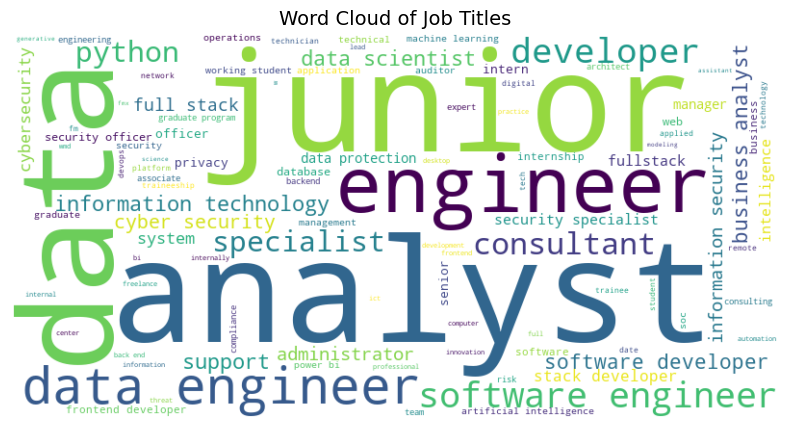

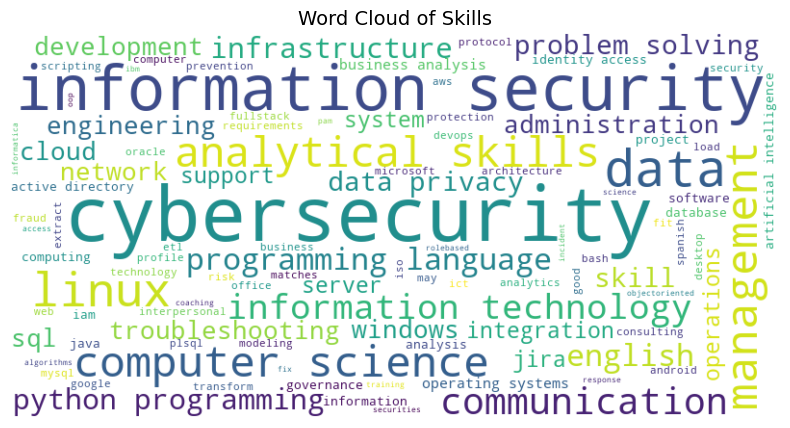

In [102]:
# Generate word clouds
plot_wordcloud(df["Cleaned_Title"], "Word Cloud of Job Titles")
plot_wordcloud(df["Cleaned_Skills"], "Word Cloud of Skills")

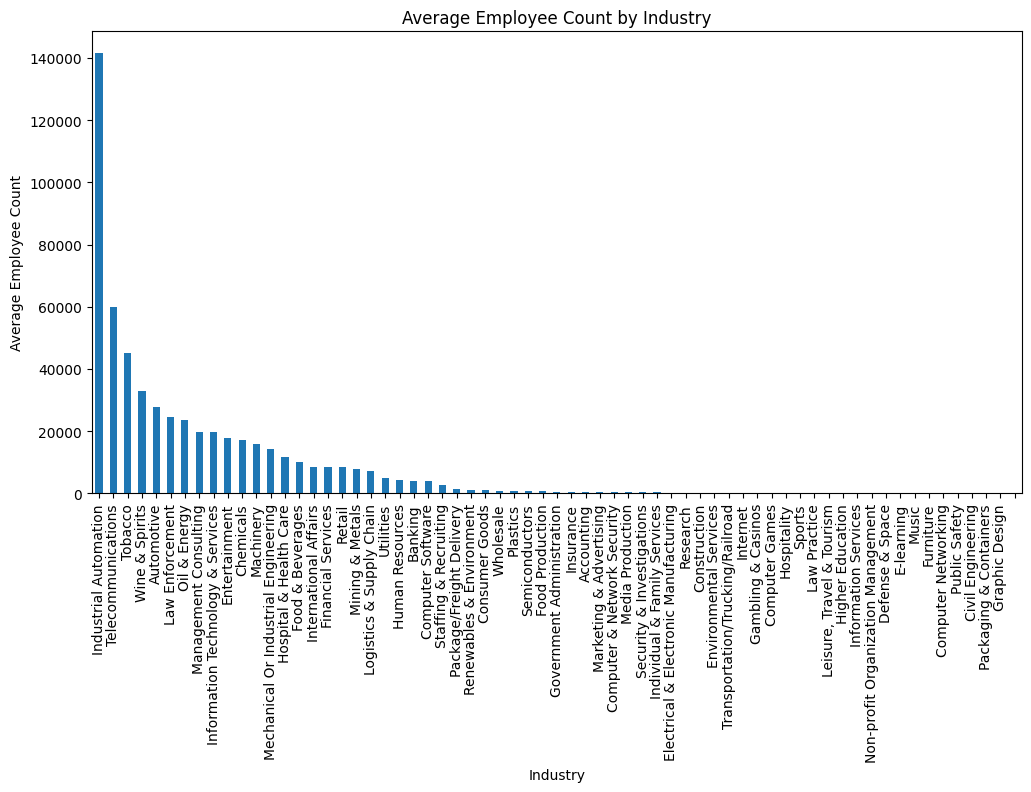

In [135]:
plt.figure(figsize=(12, 6))
df.groupby("Industry")["Employee Count"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Industry")
plt.ylabel("Average Employee Count")
plt.title("Average Employee Count by Industry")
plt.show()


In [134]:
df["Location"].value_counts().head(10)

Location
Budapest, Hungary                      63
Budapest, Budapest, Hungary            48
Munich, Bavaria, Germany               11
Madrid, Community of Madrid, Spain     10
Porto, Portugal                        10
Vienna, Austria                         9
Brussels, Brussels Region, Belgium      9
Stockholm, Stockholm County, Sweden     9
Tallinn, Harjumaa, Estonia              8
Rome, Latium, Italy                     8
Name: count, dtype: int64

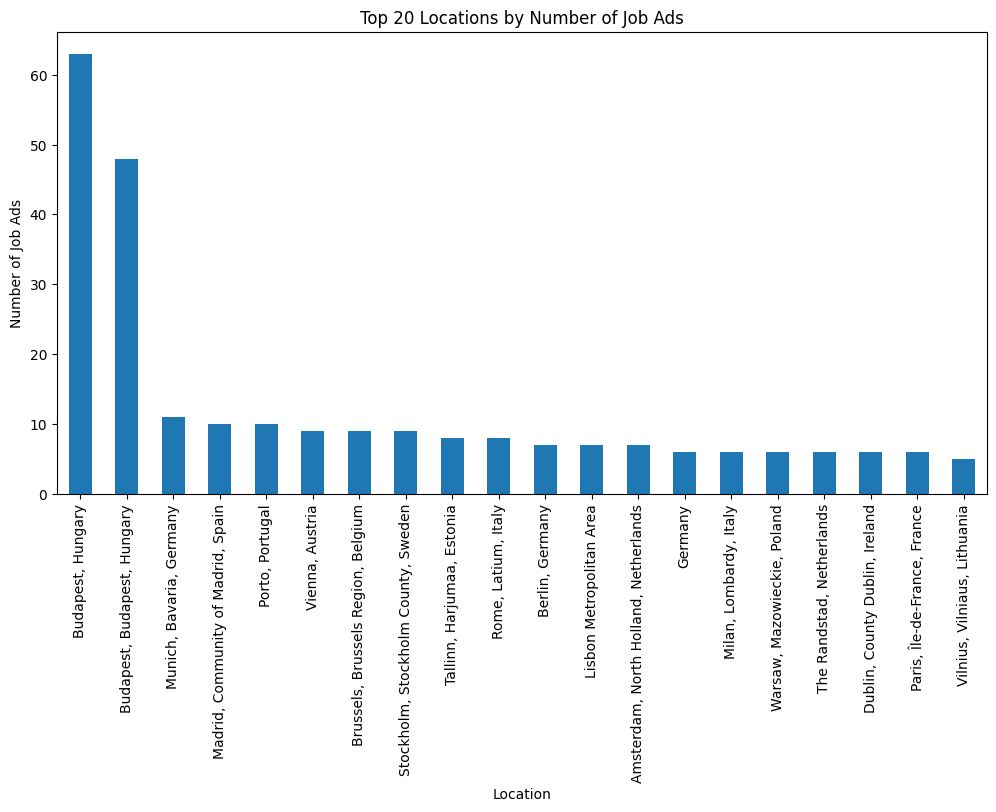

In [136]:
plt.figure(figsize=(12, 6))
df["Location"].value_counts().head(20).plot(kind="bar")
plt.xlabel("Location")
plt.ylabel("Number of Job Ads")
plt.title("Top 20 Locations by Number of Job Ads")
plt.xticks(rotation=90)
plt.show()
